In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
pos = pd.read_csv("/content/POS_CASH_balance.csv")
bur=pd.read_csv("/content/bureau.csv")
bbal=pd.read_csv("/content/bureau_balance.csv")

In [ ]:
print("POS CASH Balance Shape: ", pos.shape)
print("Bureau Shape: ", bur.shape)
print("Bureau Balance Shape: ", bbal.shape)

POS CASH Balance Shape:  (10001358, 8)
Bureau Shape:  (1716428, 17)
Bureau Balance Shape:  (27299925, 3)


##User defined Functions

In [ ]:
def getCnamesNumeric(df):
    return list(df.select_dtypes(exclude='object').columns)

def getCnamesObject(df):
    return list(df.select_dtypes(include='object').columns)

def getDetailsAboutMissingValuesAllColumns(df):
  return df.isna().sum()

def getDetailsAboutOnlyMissingValuesColumns(df):
  print("Shape: ", df.shape)
  return df[list(df.columns[df.isna().any()])].isna().sum()

def dropColumns(df, columnNames):
  for column in columnNames:
    df = df.drop(column, axis = 1)
  return df

def imputeCategoricalMissingValuesUsingMode(df):
  columnName = getCnamesObject(df)
  for col in columnName: df[col].fillna(df[col].mode().values[0], inplace = True)

def imputeNumericMissingValuesUsingMean(df):
  columnName = getCnamesNumeric(df)
  for col in columnName: df[col].fillna(df[col].mean(), inplace = True)

def plotCountPlotForCategoricalFeatures(df, cnamesObject):
  number_of_rows = (len(cnamesObject) + 1)/2
  plt.figure(figsize=(20, 6*number_of_rows))

  for i in range(0,len(cnamesObject)):
    plt.subplot(number_of_rows,2,i+1)
    sns.countplot(y=cnamesObject[i], data = df)
    plt.title(cnamesObject[i])
    plt.tight_layout()

def distributionOfCategoricalFeaturesWRTTarget(df, cnamesObject):
  plt.figure(figsize=(20, 20))

  for i in range(0,len(cnamesObject)):
    plt.subplot(5,2,i+1)
    sns.barplot(data=df, x="Accident_Severity", y=cnamesObject[i])
    plt.title(cnamesObject[i])
    plt.tight_layout()

def drawCorrelationMatrix(df) :
  length = len(getCnamesNumeric(df))
  correlaionMatrix = df.corr()
  plt.figure(figsize=(length,length*0.8))
  sns.heatmap(correlaionMatrix, annot=True,center=0,cmap = 'viridis', square=True, linewidths=.3)

def drawDistributionPlot(df, cnamesNumeric):
  number_of_rows = (len(cnamesNumeric) + 1)/2
  plt.figure(figsize=(20, 4*number_of_rows))

  for i in range(0, len(cnamesNumeric)):
    plt.subplot(number_of_rows,3,i+1)
    sns.kdeplot(df[cnamesNumeric[i]])
    plt.title(cnamesNumeric[i])
    plt.tight_layout()

In [ ]:
pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             object 
 1   SK_ID_CURR             object 
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 610.4+ MB


In [ ]:
pos.describe()

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [ ]:
pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,6a6uarx,ox6uar,-21,60.0,56.0,Active,0,0
1,uerooox,ouaa6x,-44,10.0,3.0,Active,0,0
2,oe7e66d,ud6aa7,-79,5.0,1.0,Active,0,0
3,6rbdrxd,o7eer7,-6,48.0,26.0,Active,0,0
4,76ede7x,xo7r6d,-24,18.0,14.0,Active,6,6


In [ ]:
pos.nunique()

SK_ID_PREV               936325
SK_ID_CURR               337252
MONTHS_BALANCE               96
CNT_INSTALMENT               73
CNT_INSTALMENT_FUTURE        79
NAME_CONTRACT_STATUS          9
SK_DPD                     3400
SK_DPD_DEF                 2307
dtype: int64

In [ ]:
pos.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
10001353    False
10001354    False
10001355    False
10001356    False
10001357    False
Length: 10001358, dtype: bool

In [ ]:
pos.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [ ]:
# checking missing data
total = pos.isnull().sum().sort_values(ascending = False)
percent = (pos.isnull().sum()/pos.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
MONTHS_BALANCE,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


In [ ]:
paCC = getCnamesObject(pos)
print("Number of categorical columns in previous_application: ", len(paCC), "\n", paCC)
paCC.remove('SK_ID_PREV')
paCC.remove('SK_ID_CURR')

paNC = getCnamesNumeric(pos)
print("Number of numerical columns in previous_application: ", len(paNC), "\n", paNC)

Number of categorical columns in previous_application:  3 
 ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_STATUS']
Number of numerical columns in previous_application:  5 
 ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']


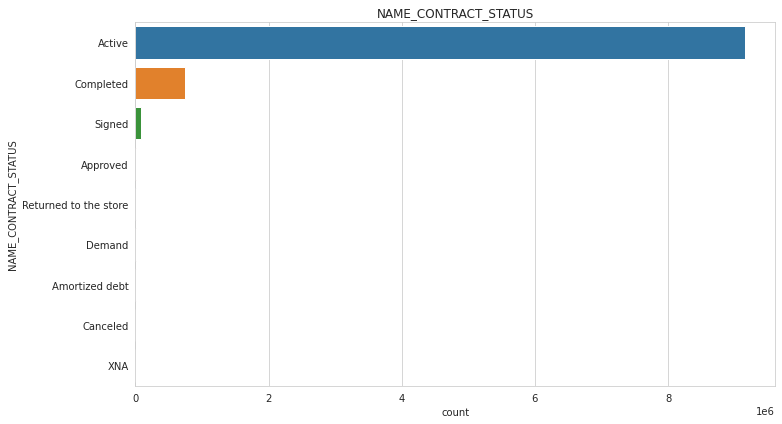

In [ ]:
plotCountPlotForCategoricalFeatures(pos, paCC)

In [ ]:
pos['NAME_CONTRACT_STATUS'].value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

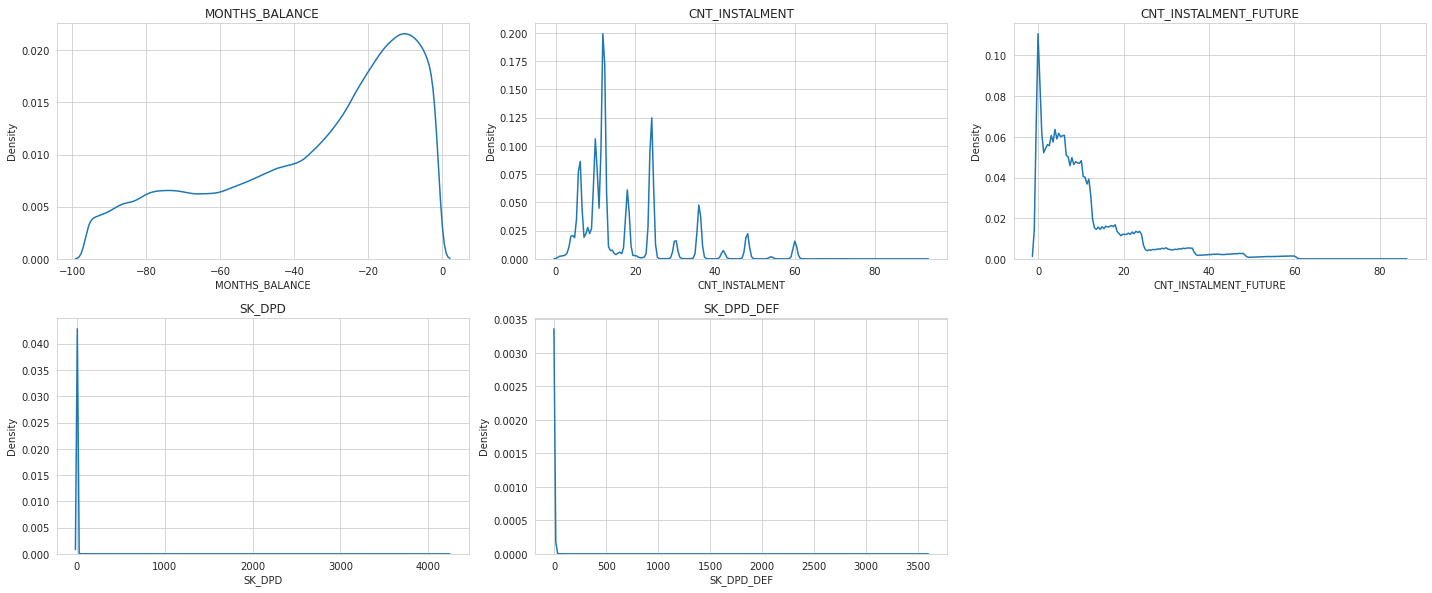

In [ ]:
drawDistributionPlot(pos, paNC)

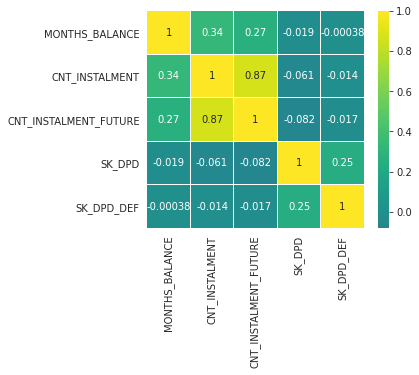

In [ ]:
drawCorrelationMatrix(pos)

In [ ]:
getDetailsAboutOnlyMissingValuesColumns(pos)

Shape:  (10001358, 8)


CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
dtype: int64

In [ ]:
imputeNumericMissingValuesUsingMean(pos)

In [ ]:
getDetailsAboutOnlyMissingValuesColumns(pos)

Shape:  (10001358, 8)


Series([], dtype: float64)

In [ ]:
bur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              object 
 1   SK_ID_BUREAU            object 
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(4), object(5)
memory usage: 222.6+ MB


In [ ]:
bur.describe()

,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [ ]:
bur.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,ue6oex,eoxbd6b,Closed,currency 1,-1835,0,-739.0,-763.0,NaN,0,675000.0,0.0,0.0,0.0,Consumer credit,-612,0.0
1,7bxax7,6oaorab,Closed,currency 1,-904,0,-722.0,-691.0,216.945,0,31500.0,0.0,0.0,0.0,Consumer credit,-691,NaN
2,axrrbx,d7xo7bb,Closed,currency 1,-893,0,-809.0,-804.0,0.000,0,45000.0,0.0,0.0,0.0,Microloan,-796,NaN
3,a7bd7r,o6drrx6,Closed,currency 1,-2246,0,-420.0,-420.0,0.000,0,2700000.0,0.0,0.0,0.0,Consumer credit,-414,NaN
4,roaexd,a66our6,Closed,currency 1,-2584,0,-2218.0,-2218.0,7042.365,0,83205.0,0.0,0.0,0.0,Consumer credit,-2218,NaN


In [ ]:
bur.nunique()

SK_ID_CURR                 305811
SK_ID_BUREAU              1716428
CREDIT_ACTIVE                   4
CREDIT_CURRENCY                 4
DAYS_CREDIT                  2923
CREDIT_DAY_OVERDUE            942
DAYS_CREDIT_ENDDATE         14096
DAYS_ENDDATE_FACT            2917
AMT_CREDIT_MAX_OVERDUE      68251
CNT_CREDIT_PROLONG             10
AMT_CREDIT_SUM             236708
AMT_CREDIT_SUM_DEBT        226537
AMT_CREDIT_SUM_LIMIT        51726
AMT_CREDIT_SUM_OVERDUE       1616
CREDIT_TYPE                    15
DAYS_CREDIT_UPDATE           2982
AMT_ANNUITY                 40321
dtype: int64

In [ ]:
buCC = getCnamesObject(bur)
print("Number of categorical columns in Bureau: ", len(buCC), "\n", buCC)
buCC.remove('SK_ID_BUREAU')
buCC.remove('SK_ID_CURR')

buNC = getCnamesNumeric(bur)
print("Number of numerical columns in Bureau: ", len(buNC), "\n", buNC)

Number of categorical columns in Bureau:  5 
 ['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']
Number of numerical columns in Bureau:  12 
 ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']


In [ ]:
# checking missing data percentage
total = bur.isnull().sum().sort_values(ascending = False)
percent = (bur.isnull().sum()/bur.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_TYPE,0,0.000000
AMT_CREDIT_SUM_OVERDUE,0,0.000000
CNT_CREDIT_PROLONG,0,0.000000


In [ ]:
bur.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

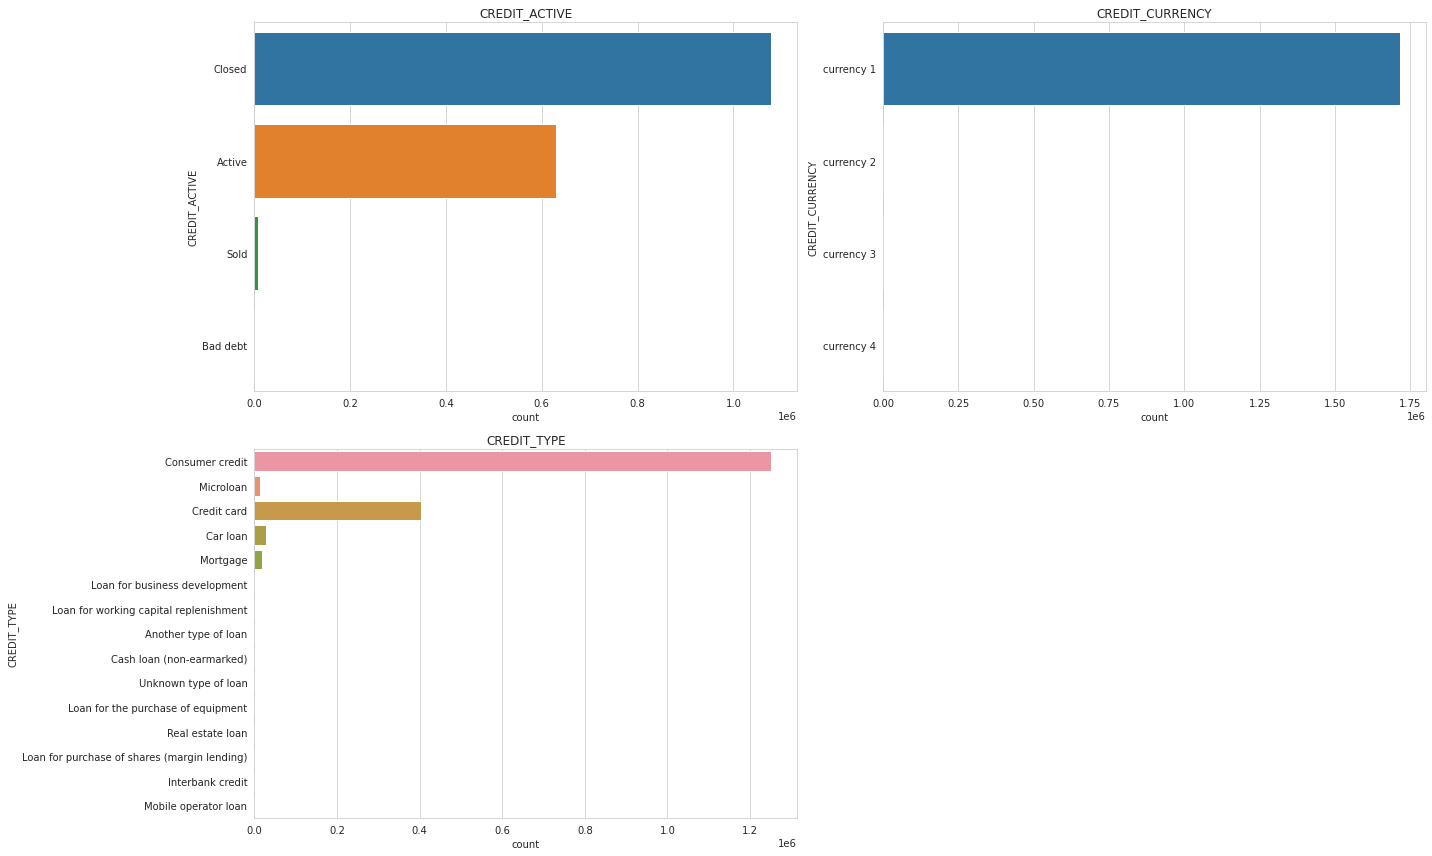

In [ ]:
plotCountPlotForCategoricalFeatures(bur,buCC)

In [ ]:
bur[['CREDIT_ACTIVE']].value_counts()

CREDIT_ACTIVE
Closed           1079273
Active            630607
Sold                6527
Bad debt              21
dtype: int64

In [ ]:
bur[['CREDIT_CURRENCY']].value_counts()

CREDIT_CURRENCY
currency 1         1715020
currency 2            1224
currency 3             174
currency 4              10
dtype: int64

In [ ]:
bur[['CREDIT_TYPE']].value_counts()

CREDIT_TYPE                                 
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
dtype: int64

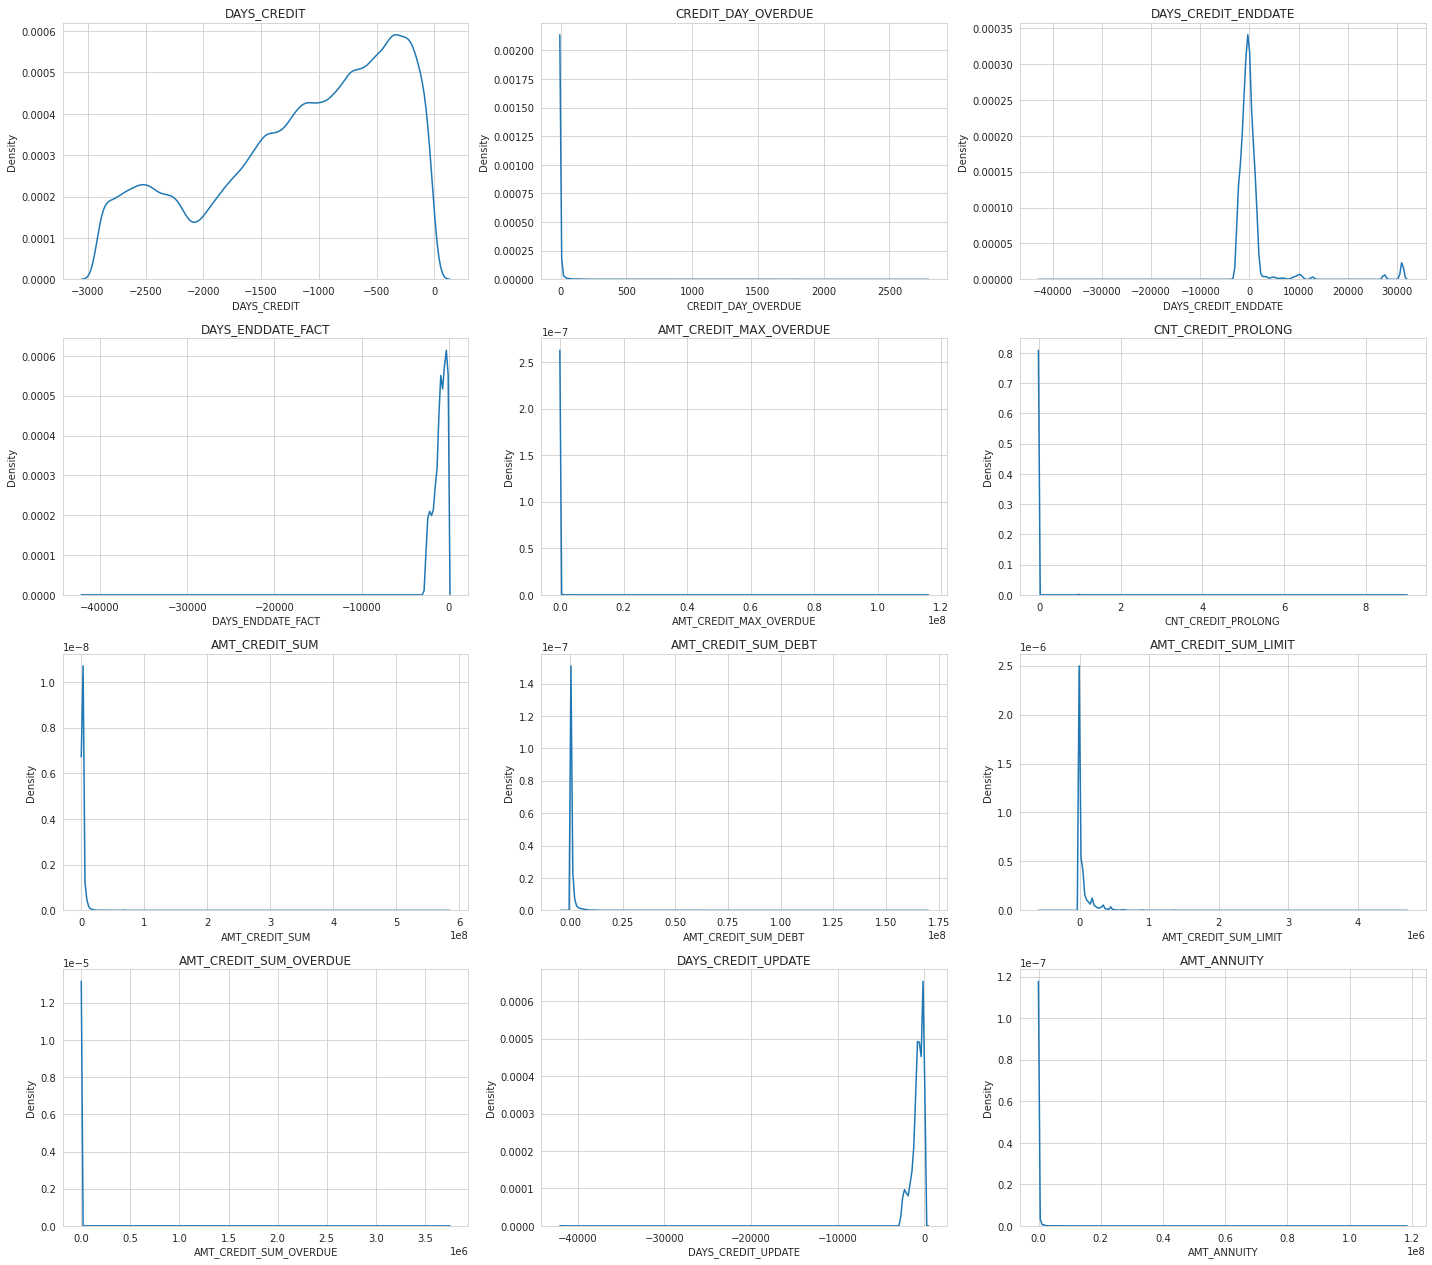

In [ ]:
drawDistributionPlot(bur, buNC)

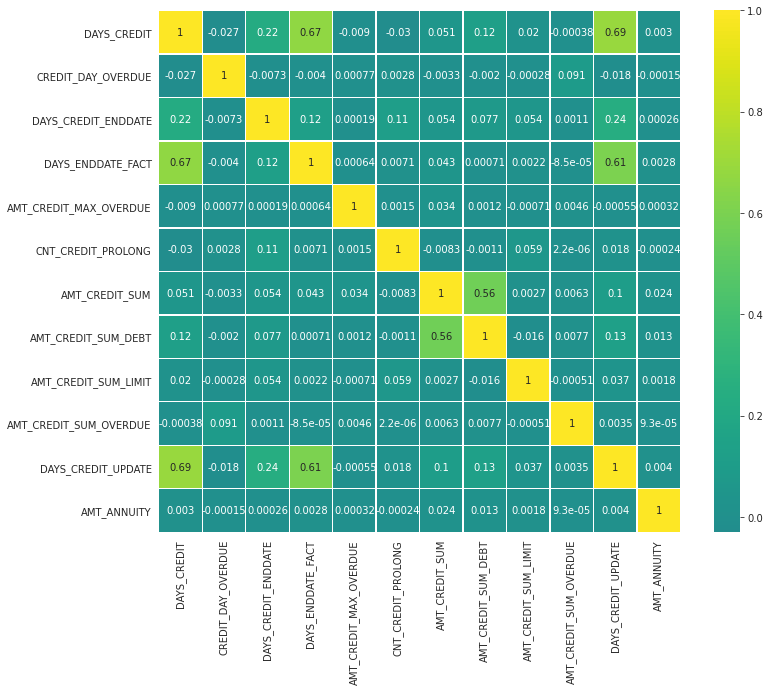

In [ ]:
drawCorrelationMatrix(bur)

In [ ]:
getDetailsAboutOnlyMissingValuesColumns(bur)

Shape:  (1716428, 17)


DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_ANNUITY               1226791
dtype: int64

In [ ]:
imputeNumericMissingValuesUsingMean(bur)

In [ ]:
getDetailsAboutOnlyMissingValuesColumns(bur)

Shape:  (1716428, 17)


Series([], dtype: float64)

In [ ]:
bbal.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    object
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(1), object(2)
memory usage: 624.8+ MB


In [ ]:
bbal.describe()

,MONTHS_BALANCE
count,2.729992e+07
mean,-3.074169e+01
std,2.386451e+01
min,-9.600000e+01
25%,-4.600000e+01
50%,-2.500000e+01
75%,-1.100000e+01
max,0.000000e+00


In [ ]:
bbal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,rera7rb,-2,C
1,eoru6bb,-62,X
2,xebr7e6,-62,C
3,dre7676,-5,X
4,rrda6db,-70,C


In [ ]:
bbal.nunique()

SK_ID_BUREAU      817395
MONTHS_BALANCE        97
STATUS                 8
dtype: int64

In [ ]:
bbal.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [ ]:
# checking missing data
total = bbal.isnull().sum().sort_values(ascending = False)
percent = (bbal.isnull().sum()/bbal.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data

,Total,Percent
STATUS,0,0.0
MONTHS_BALANCE,0,0.0
SK_ID_BUREAU,0,0.0


In [ ]:
balCC = getCnamesObject(bbal)
print("Number of categorical columns in balance bureau: ", len(balCC), "\n", balCC)
balCC.remove('SK_ID_BUREAU')

balNC = getCnamesNumeric(bbal)
print("Number of numerical columns in balance bureau: ", len(balNC), "\n", balNC)

Number of categorical columns in balance bureau:  2 
 ['SK_ID_BUREAU', 'STATUS']
Number of numerical columns in balance bureau:  1 
 ['MONTHS_BALANCE']


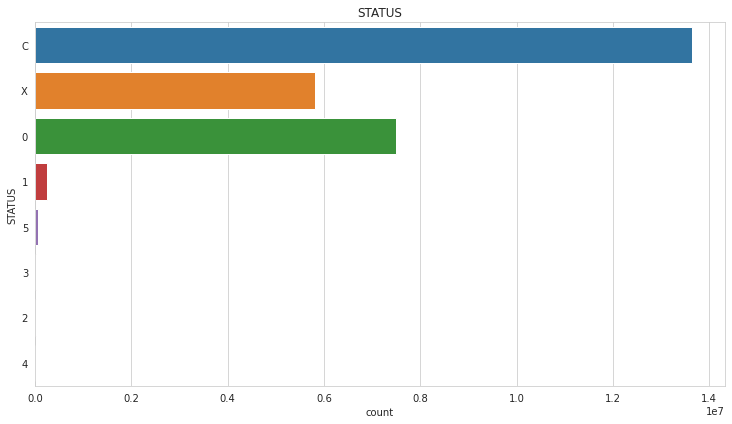

In [ ]:
plotCountPlotForCategoricalFeatures(bbal,balCC)

In [ ]:
bbal[['STATUS']].value_counts()

STATUS
C         13646993
0          7499507
X          5810482
1           242347
5            62406
2            23419
3             8924
4             5847
dtype: int64

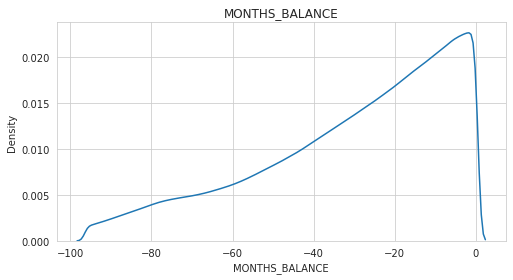

In [ ]:
drawDistributionPlot(bbal,balNC)

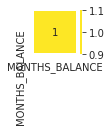

In [ ]:
drawCorrelationMatrix(bbal)

In [ ]:
getDetailsAboutOnlyMissingValuesColumns(bbal)

Shape:  (27299925, 3)


Series([], dtype: float64)